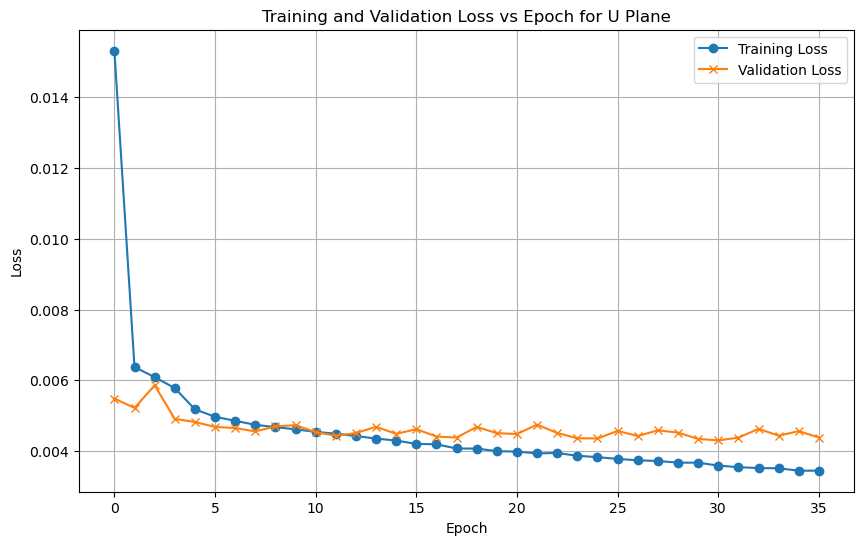

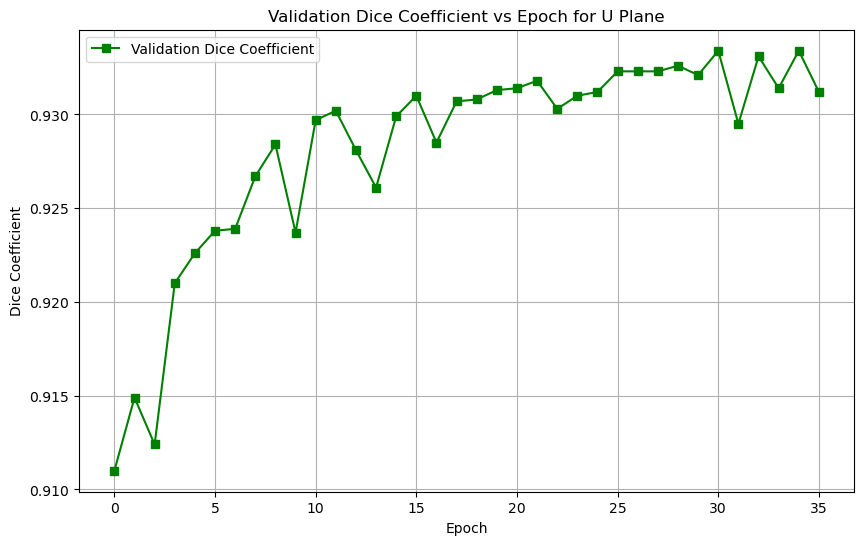

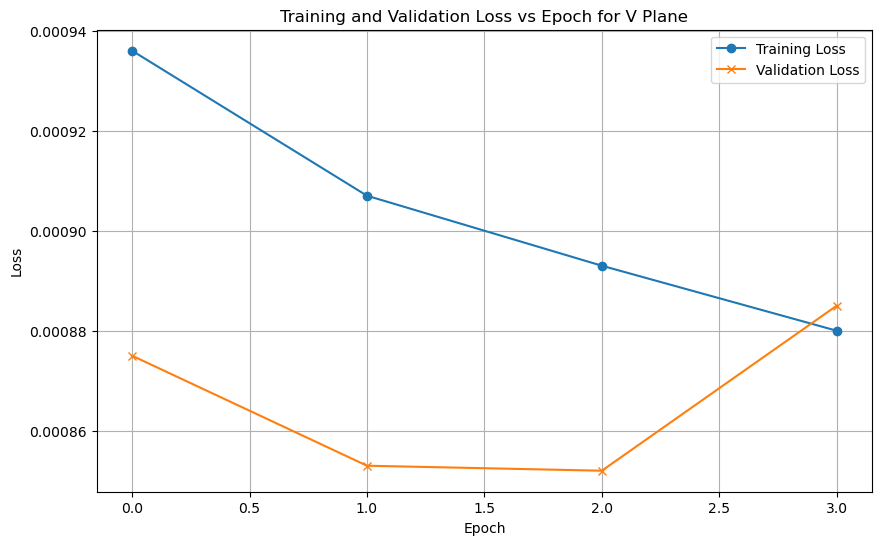

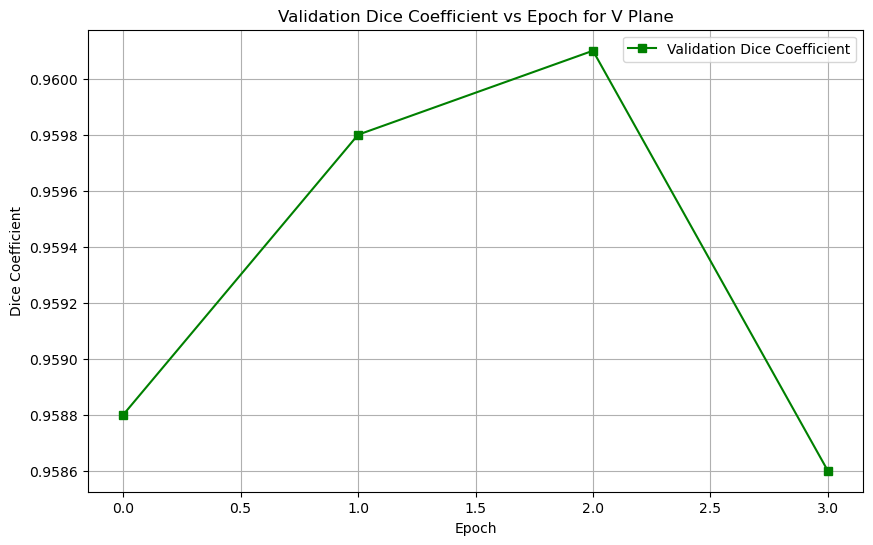

In [16]:
import re
import matplotlib.pyplot as plt

# Define the log file paths
log_files = {
    'U Plane': '/home/abhat/wirecell_icarus/Pytorch-UNet/UNet_U.log',
    'V Plane': '/home/abhat/wirecell_icarus/Pytorch-UNet/UNet_V.log'
}

# Regex patterns to match the required information
train_loss_pattern = r"Epoch finished ! Loss: ([\d\.]+)"
val_loss_pattern = r"Validation Dice Coeff: ([\d\.]+), Loss: ([\d\.]+)"

# Function to extract data from log file
def extract_data(log_file):
    train_losses = []
    val_losses = []
    val_dices = []
    
    with open(log_file, 'r') as file:
        for line in file:
            # Extract training loss
            train_loss_match = re.search(train_loss_pattern, line)
            if train_loss_match:
                train_losses.append(float(train_loss_match.group(1)))
            
            # Extract validation loss and dice coefficient
            val_loss_match = re.search(val_loss_pattern, line)
            if val_loss_match:
                val_dices.append(float(val_loss_match.group(1)))
                val_losses.append(float(val_loss_match.group(2)))
    
    # Return the data, ensuring all lists have the same length
    min_len = min(len(train_losses), len(val_losses), len(val_dices))
    return train_losses[:min_len], val_losses[:min_len], val_dices[:min_len]

# Plot function for loss
def plot_losses(plane, train_losses, val_losses):
    epochs = range(len(train_losses))  # Start epochs from 0

    plt.figure(figsize=(10, 6))
    
    # Plot training and validation loss
    plt.plot(epochs, train_losses, label="Training Loss", marker='o')
    plt.plot(epochs, val_losses, label="Validation Loss", marker='x')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss vs Epoch for {plane}')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Plot function for dice coefficient
def plot_dice(plane, val_dices):
    epochs = range(len(val_dices))  # Start epochs from 0

    plt.figure(figsize=(10, 6))
    
    # Plot validation dice coefficient
    plt.plot(epochs, val_dices, label="Validation Dice Coefficient", marker='s', color='green')
    
    plt.xlabel('Epoch')
    plt.ylabel('Dice Coefficient')
    plt.title(f'Validation Dice Coefficient vs Epoch for {plane}')
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

# Loop through log files for U Plane and V Plane
for plane, log_file in log_files.items():
    train_losses, val_losses, val_dices = extract_data(log_file)
    plot_losses(plane, train_losses, val_losses)
    plot_dice(plane, val_dices)
